In [12]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [13]:
img_rows = 224
img_cols = 224

In [14]:
DIRECTORY = "dataset"
CATEGORIES = ["with_mask", "without_mask", "final_incorrect_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
#print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            image = load_img(img_path, target_size=(img_rows, img_cols))
            image = img_to_array(image)
            image = preprocess_input(image)
            data.append(image)
            labels.append(category)
        except:
            continue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


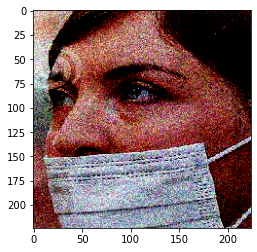

In [19]:
plt.imshow(data[5004])

In [21]:
count = 0
for i in range(len(labels)):
    if labels[i] == "final_incorrect_mask":
        count += 1
print(count)

1946


In [22]:
count = 0
for i in range(len(labels)):
    if labels[i] == "with_mask":
        count += 1
print(count)

2162


In [23]:
count = 0
for i in range(len(labels)):
    if labels[i] == "without_mask":
        count += 1
print(count)

1930


In [24]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [25]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [26]:
print(data.shape)
print(labels.shape)

(6038, 224, 224, 3)
(6038, 3)


In [27]:
pickle.dump(data, open('pickle_files\data.pkl', 'wb'))
pickle.dump(labels, open('pickle_files\labels.pkl', 'wb'))
pickle.dump(lb, open('pickle_files\lb.pkl', 'wb'))